## Imports

In [31]:
import numpy as np
import scipy.stats
from scipy.stats import norm, truncnorm,binom
from scipy.io import loadmat

import pickle
import imp
import sys

sys.path.append('../code/')

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [32]:
import task_utils
imp.reload(task_utils)
from task_utils import idcs2state,state2idcs,action_str_to_num

import task_gridworld
imp.reload(task_gridworld)
from task_gridworld import Task_GridWorld

import mscl
imp.reload(mscl)
from mscl import calc_cvar_from_samples

import dp
imp.reload(dp)
from dp import CVaR_DP

import mcmc_eval
imp.reload(mcmc_eval)
from mcmc_eval import run_simulation, calc_V_CVaR_MCMC, calc_policy_and_alphas_from_mcmc

## Shared Parameters

In [33]:
alpha_set = np.array([0.        , 0.01      , 0.01274275, 0.01623777, 0.02069138,
       0.02636651, 0.03359818, 0.04281332, 0.05455595, 0.06951928,
       0.08858668, 0.11288379, 0.14384499, 0.18329807, 0.23357215,
       0.29763514, 0.37926902, 0.48329302, 0.61584821, 0.78475997,
       1.        ])

In [7]:
Nsims=20000
Nsims=1000

## pCVaR 

### Load Optimal Policy

In [47]:
T = 40
savename= '../results/task_gridworld_pCVaR_T='+str(T)+'_21_alphaset.p'
print(savename)

../results/task_gridworld_pCVaR_T=40_21_alphaset.p


In [48]:
results = pickle.load( open(savename, "rb" ) )

### Sample Trajectories For Different Alpha Values

In [49]:
task = Task_GridWorld()

In [50]:
policy_to_evaluate = results['pi'].copy()

In [51]:
results_mcmc_outer = {}

In [52]:
s0 = 0
for alpha0 in alpha_set:
    
    if str(alpha0) not in results_mcmc_outer.keys():

        # get alpha indicator 
        alpha0_i = np.where(alpha_set==alpha0)[0][0]
        print(alpha_set[alpha0_i])

        # run the MCMC for the changing policy 
        results_mcmc = run_simulation(task,
                                       policy_to_evaluate,  # must be states x actions x alphas x time-steps
                                       T=T,
                                       Nsims = Nsims,
                                       s0 = s0,
                                       alpha_i0= alpha0_i,
                                       alpha_set = alpha_set,
                                       Xis=results['Xis'],
                                       adjust_alpha=True)  
        results_mcmc_outer[str(alpha0)]=results_mcmc

0.0
0.01
0.01274275
0.01623777
0.02069138
0.02636651
0.03359818
0.04281332
0.05455595
0.06951928
0.08858668
0.11288379
0.14384499
0.18329807
0.23357215
0.29763514
0.37926902
0.48329302
0.61584821
0.78475997
1.0


In [55]:
savename_mcmc = '../results/task_gridworld_pCVaR_T='+str(T)+'_21_alphaset_mcmc_other_alphas.p'

In [56]:
# save 
pickle.dump(results_mcmc_outer, 
            open(savename_mcmc, "wb" ) )

## nCVaR 

### Load Optimal Policy

In [16]:
T = 40
savename= '../results/task_gridworld_nCVaR_T='+str(T)+'_21_alphaset.p'
print(savename)

../results/task_gridworld_nCVaR_T=40_21_alphaset.p


In [17]:
results = pickle.load( open(savename, "rb" ) )

### Sample Trajectories for Different Alpha Values

In [18]:
task = Task_GridWorld()

In [19]:
policy_to_evaluate = results['pi'].copy()

In [20]:
results_mcmc_outer = {}

In [22]:
s0 = 0
for alpha0 in alpha_set:
    
    if str(alpha0) not in results_mcmc_outer.keys():

        # get alpha indicator 
        alpha0_i = np.where(alpha_set==alpha0)[0][0]
        print(alpha_set[alpha0_i])

        # run the MCMC for the changing policy 
        results_mcmc = run_simulation(task,
                                       policy_to_evaluate,  # must be states x actions x alphas x time-steps
                                       T=T,
                                       Nsims = Nsims,
                                       s0 = s0,
                                       alpha_i0= alpha0_i,
                                       alpha_set = alpha_set,
                                       Xis=None,
                                       adjust_alpha=False)  
        results_mcmc_outer[str(alpha0)]=results_mcmc

0.0
0.01
0.01274275
0.01623777
0.02069138
0.02636651
0.03359818
0.04281332
0.05455595
0.06951928
0.08858668
0.11288379
0.14384499
0.18329807
0.23357215
0.29763514
0.37926902
0.48329302
0.61584821
0.78475997
1.0


In [23]:
savename_mcmc = '../results/task_gridworld_nCVaR_T='+str(T)+'_21_alphaset_mcmc_other_alphas.p'

In [24]:
# save 
pickle.dump(results_mcmc_outer, 
            open(savename_mcmc, "wb" ) )

## fCVaR (requires calculating fCVaR policies for all alphas; see optional section in Figure 6 notebook)

###  Calculate Optimal Policy for Other Values fo Alpha (Slow)

In [ ]:
# example; for running all remove `[0:2]` in the next line
for alpha0 in alpha_set[2::]:

    task = Task_GridWorld()

    results = CVaR_DP(task,
                        T=40,
                        alpha_set = alpha_set,
                        alpha0=alpha0,
                        cvar_type='fCVaR',
                        parallel=True)
    
    results.pop('Xis')

    savename= '../results/task_gridworld_fCVaR_T='+str(T)+'_21_alphaset'+str(np.round(alpha0,3))+'.p'
    print(savename)

    pickle.dump(results, 
                open(savename, "wb" ) )

### Sample Trajectories for Different Alpha Values

In [29]:
results_mcmc_outer = {}

In [36]:
s0 = 0
for alpha0 in alpha_set:
    
    if str(alpha0) not in results_mcmc_outer.keys():
        
        # load the original results 
        roundd=3
        savename= '../results/task_gridworld_fCVaR_T='+str(T)+'_21_alphaset'+str(np.round(alpha0,roundd))+'.p'
        results = pickle.load( open(savename, "rb" ) )
    
        # get policy to evaluate 
        policy_to_evaluate = results['pi'].copy()
        
        # set up task 
        task = Task_GridWorld()
        
        # get alpha indicator 
        alpha0_i = np.where(alpha_set==alpha0)[0][0]
        print(alpha_set[alpha0_i])

        # run the MCMC for the changing policy 
        results_mcmc = run_simulation(task,
                                       policy_to_evaluate,  # must be states x actions x alphas x time-steps
                                       T=T,
                                       Nsims = Nsims,
                                       s0 = s0,
                                       alpha_i0= alpha0_i,
                                       alpha_set = alpha_set,
                                       Xis=None,
                                       adjust_alpha=False)  
        results_mcmc_outer[str(alpha0)]=results_mcmc

0.14384499
0.18329807
0.23357215
0.29763514
0.37926902
0.48329302
0.61584821
0.78475997
1.0


In [39]:
savename_mcmc = '../results/task_gridworld_fCVaR_T='+str(T)+'_21_alphaset_mcmc_other_alphas.p'

In [40]:
# save 
pickle.dump(results_mcmc_outer, 
            open(savename_mcmc, "wb" ) )

## Load Optimal Polices, Sampled Trajectories

In [69]:
alphas = alpha_set
print(len(alphas))

21


In [70]:
# load optimal policies for all three
T = 40
savename= '../results/task_gridworld_nCVaR_T='+str(T)+'_21_alphaset.p'
results_nCVaR = pickle.load( open(savename, "rb" ) )

savename= '../results/task_gridworld_pCVaR_T='+str(T)+'_21_alphaset.npz'
loaded = np.load(savename,allow_pickle=True)
results_pCVaR = loaded['results'].tolist()

results_fCVaR = {}
for alpha0 in alphas:
    
    roundd=3
    savename= '../results/task_gridworld_fCVaR_T='+str(T)+'_21_alphaset'+str(np.round(alpha0,roundd))+'.p'
    results_fCVaR[str(alpha0)] = pickle.load( open(savename, "rb" ) )

In [71]:
# load simulated trajectories for all three
savename_mcmc = '../results/task_gridworld_pCVaR_T='+str(T)+'_21_alphaset_mcmc_other_alphas.p'
results_mcmc_outer_pCVaR = pickle.load( open(savename_mcmc, "rb" ) )

savename_mcmc = '../results/task_gridworld_nCVaR_T='+str(T)+'_21_alphaset_mcmc_other_alphas.p'
results_mcmc_outer_nCVaR = pickle.load( open(savename_mcmc, "rb" ) )

savename_mcmc = '../results/task_gridworld_fCVaR_T='+str(T)+'_21_alphaset_mcmc_other_alphas.p'
results_mcmc_outer_fCVaR = pickle.load( open(savename_mcmc, "rb" ) )

## Tabulate Actions Taken in Each State

In [72]:
# get policy by alpha for nCVaR
policy_to_evaluate = results_nCVaR['pi'].copy()
policy_by_alpha_nCVaR = []
states = np.array([0,5,10])
action = 1
t = 0
for alpha0 in alphas:
    alpha_idx=np.where(alpha_set==alpha0)[0][0]
    
    # get policy from simulated trajectories 
    if alpha0==0.0:
        alpha0_str='0.0'
    else:
        alpha0_str = str(alpha0)
    Pol_Dyn,_,_ = calc_policy_and_alphas_from_mcmc(results_mcmc_outer_nCVaR[alpha0_str])
    pp = Pol_Dyn[states,1]
    
    # if nan, get policy from DP             
    for state_i,state in enumerate(states):
        if np.isnan(pp[state_i]):
            pp[state_i] = policy_to_evaluate[state,action,alpha_idx,t]        
    
    policy_by_alpha_nCVaR.append(pp)

policy_by_alpha_nCVaR = np.array(policy_by_alpha_nCVaR)

/kyb/agpd/cgagne/CVaR_TwoStep/twosteps_neurips2021/gridworld_simulations/notebooks/../code/mcmc_eval.py:134: RuntimeWarning: Mean of empty slice.
  p = actions.mean()
/kyb/agpd/cgagne/miniconda3/envs/env_twosteps/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/kyb/agpd/cgagne/CVaR_TwoStep/twosteps_neurips2021/gridworld_simulations/notebooks/../code/mcmc_eval.py:139: RuntimeWarning: Mean of empty slice.
  Alpha_Dyn[s]= results_mcmc['alphas'][results_mcmc['states']==s].mean()
/kyb/agpd/cgagne/miniconda3/envs/env_twosteps/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/kyb/agpd/cgagne/miniconda3/envs/env_twosteps/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out

In [73]:
# get policy by alpha for pCVaR

policy_to_evaluate = results_pCVaR['pi'].copy()

policy_by_alpha_pCVaR = []
states = np.array([0,5,10])
action = 1
t = 0
for alpha0 in alphas:
    alpha_idx=np.where(alpha_set==alpha0)[0][0]

    # get policy from mcmc results 
    if alpha0==0.0:
        alpha0_str='0.0'
    else:
        alpha0_str = str(alpha0)
    Pol_Dyn,_,_ = calc_policy_and_alphas_from_mcmc(results_mcmc_outer_pCVaR[alpha0_str])
    pp = Pol_Dyn[states,1]
    
    for state_i,state in enumerate(states):
        if np.isnan(pp[state_i]):
            pp[state_i] = policy_to_evaluate[state,action,alpha_idx,t]        
    
    policy_by_alpha_pCVaR.append(pp)
    
policy_by_alpha_pCVaR = np.array(policy_by_alpha_pCVaR)

In [74]:
# get policy by alpha for fCVaR

policy_by_alpha_fCVaR = []
states = np.array([0,5,10])
action = 1
t = 0
for alpha0 in alphas:
    alpha_idx=np.where(alpha_set==alpha0)[0][0]
    
    # get policy from the correct DP results 
    policy_to_evaluate = results_fCVaR[str(alpha0)]['pi'].copy()
    #policy_by_alpha_fCVaR.append(policy_to_evaluate[states,action,alpha_idx,t])
    
    # get policy from mcmc results 
    if alpha0==0.0:
        alpha0_str='0.0'
    else:
        alpha0_str = str(alpha0)
    Pol_Dyn,_,_ = calc_policy_and_alphas_from_mcmc(results_mcmc_outer_fCVaR[alpha0_str])
    pp = Pol_Dyn[states,1]
    
    # if nan, get policy from DP             
    for state_i,state in enumerate(states):
        if np.isnan(pp[state_i]):
            pp[state_i] = policy_to_evaluate[state,action,alpha_idx,t]        
    
    policy_by_alpha_fCVaR.append(pp)
    
    
policy_by_alpha_fCVaR = np.array(policy_by_alpha_fCVaR)

In [75]:
Pol_Dyn.shape

(12, 2)

In [76]:
state_dict = {}
state_dict[0]='(1,1)'
state_dict[5]='(2,2)'
state_dict[10]='(3,3)'

## Plot

/tmp/ipykernel_18933/2690137542.py:41: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


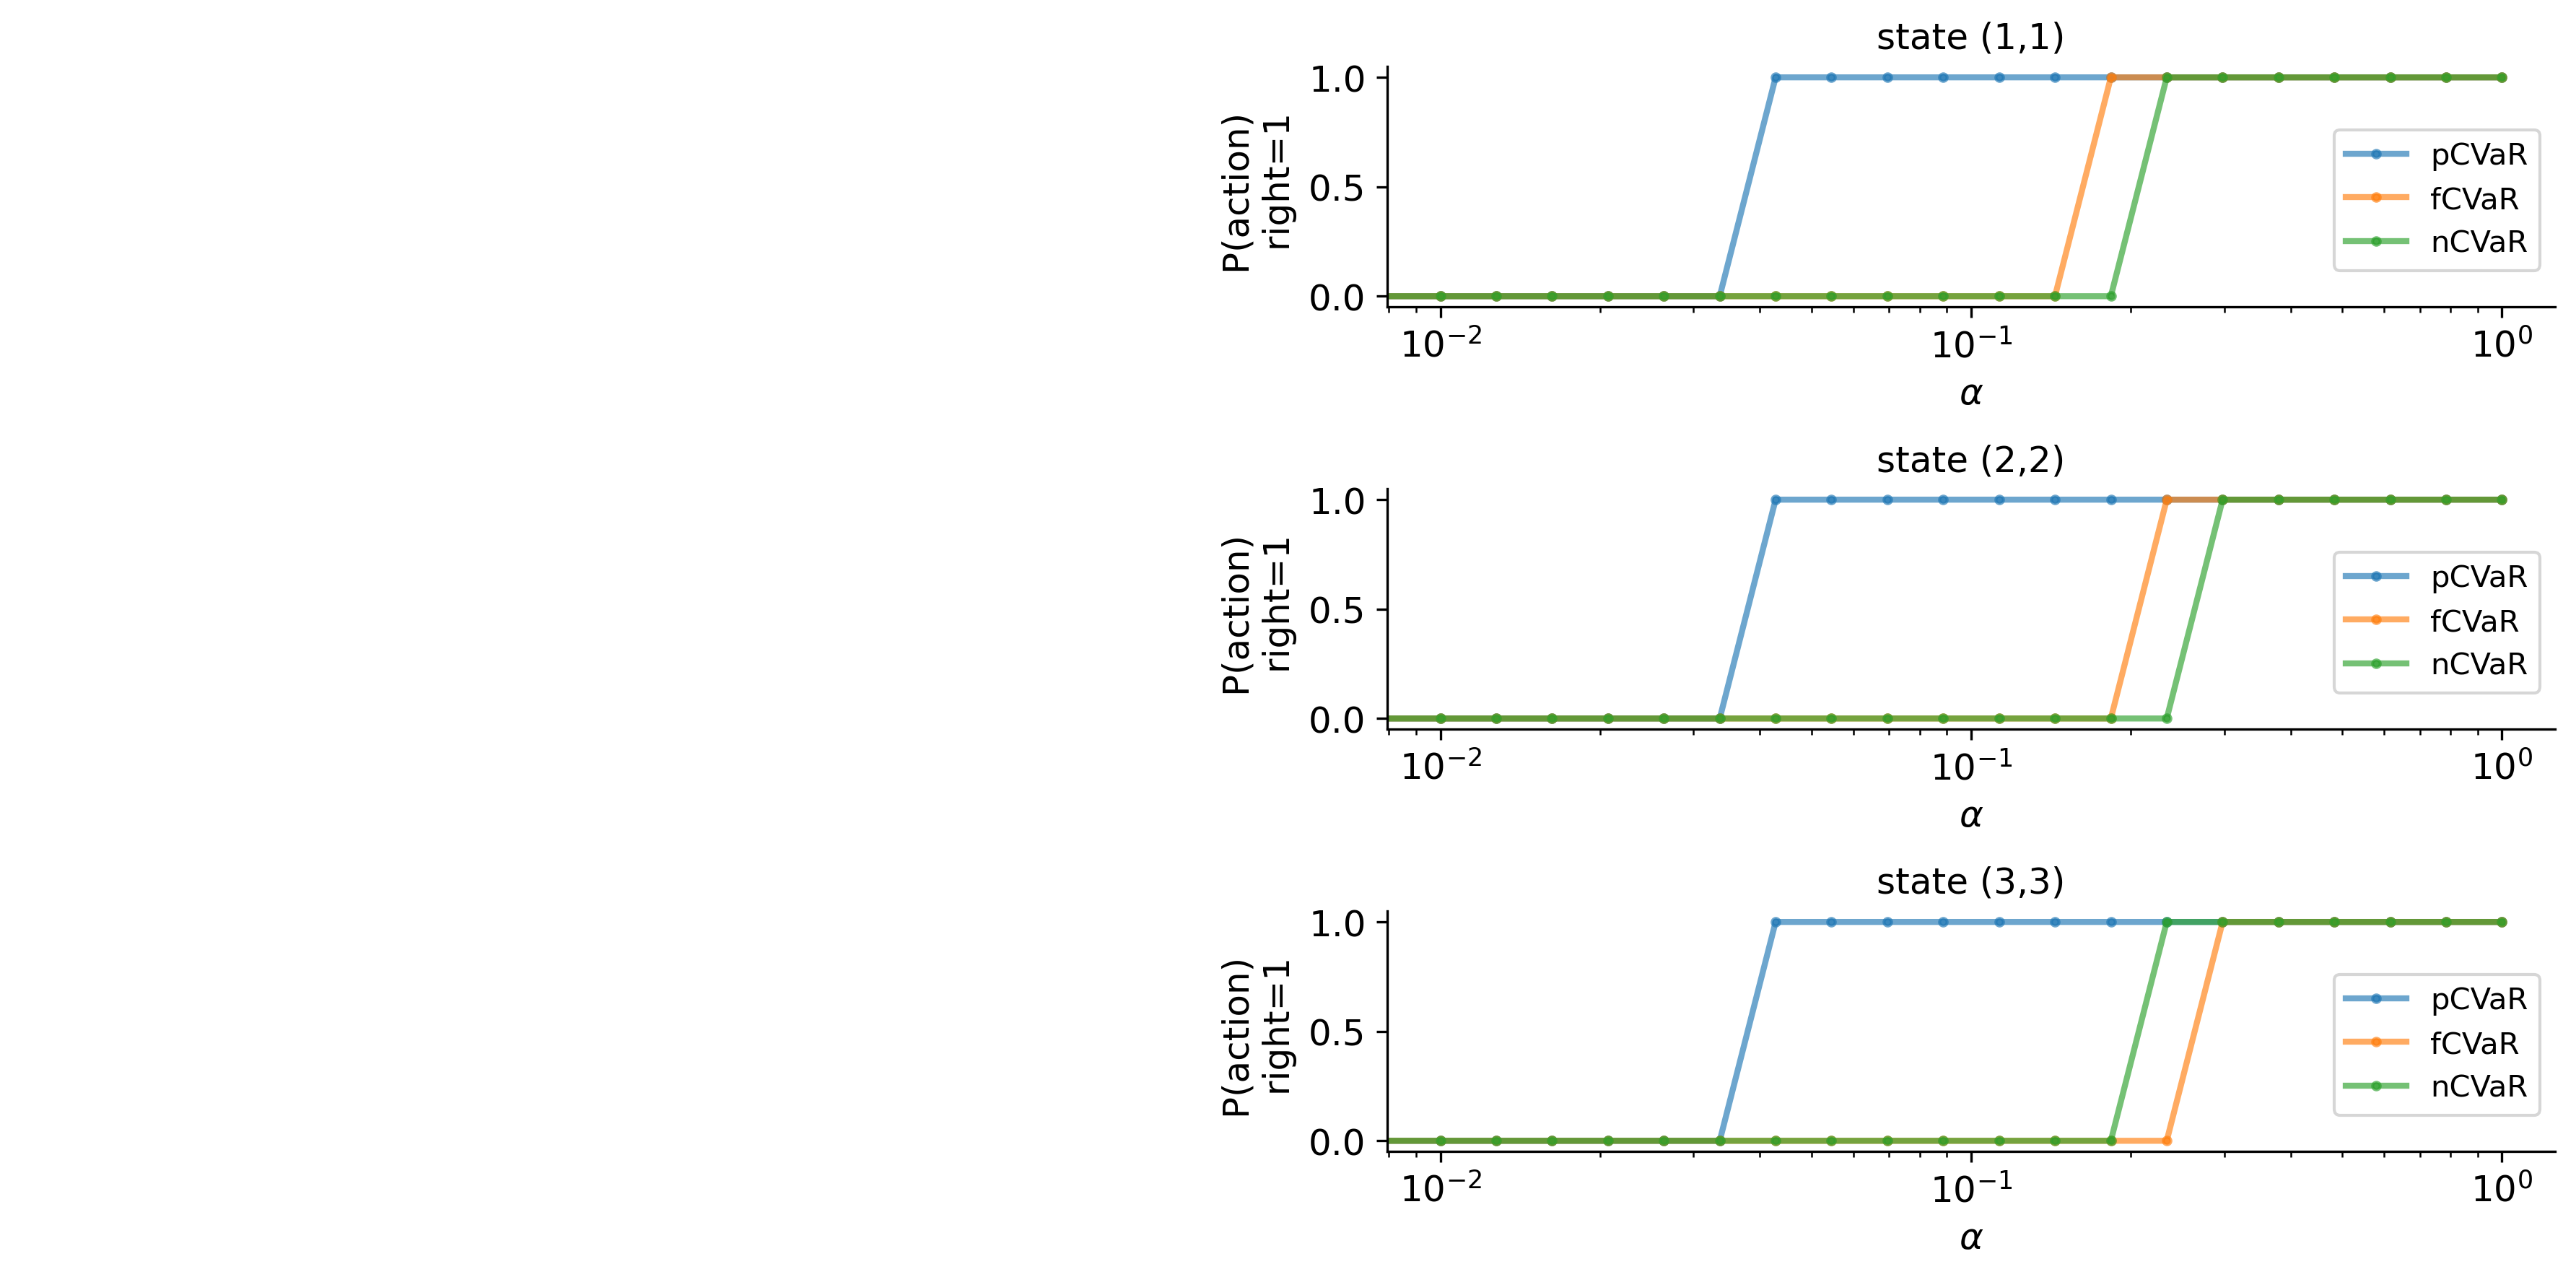

In [77]:
#fig,axes = plt.subplots(2,2,figsize=(12,8),dpi=300)
fig = plt.figure(constrained_layout=True,figsize=(12,6),dpi=300)
gs = fig.add_gridspec(3, 2)
ax_gridworld = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[2,1])

m = '.'
ms=5
fs = 12
lw = 2
alpha=0.65

for state,ax in zip(states,[ax1,ax2,ax3]):
    
    plt.sca(ax)
    state_idx = np.where(states==state)[0]

    plt.plot(alphas,policy_by_alpha_pCVaR[:,state_idx],marker=m,ms=ms,label='pCVaR',alpha=alpha,linewidth=lw)
    plt.plot(alphas,policy_by_alpha_fCVaR[:,state_idx],marker=m,ms=ms,label='fCVaR',alpha=alpha,linewidth=lw)
    plt.plot(alphas,policy_by_alpha_nCVaR[:,state_idx],marker=m,ms=ms,label='nCVaR',alpha=alpha,linewidth=lw)
    
    #plt.axvline(x=0.23357215,linestyle='--',color='k',linewidth=0.5,alpha=0.5)
    #plt.scatter(x=0.18329807,y=-0.05,marker='o',color='k')

    sns.despine()
    plt.title('state '+state_dict[state],fontsize=fs)
    plt.xlabel(r'$\alpha$',fontsize=fs)
    plt.ylabel("P(action) \n right=1",fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.legend(bbox_to_anchor=[1,0.8])
    ax.set_xscale('log')

    
ax_gridworld.set_yticks([])
ax_gridworld.set_xticks([])
ax_gridworld.axis('off')

plt.tight_layout()